In [1]:
import numpy as np
import pandas as pd
import re
from tensorflow import keras
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [2]:
#loading data
data = pd.read_csv('uci-news-aggregator.csv',sep = ",",skipinitialspace=True)
#data_sample = data.sample(n=25000,random_state =42)

In [3]:
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
ds = data.sample(frac=1).reset_index(drop=True)
ds.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,174754,LG to unveil G3 in May,http://nwww.koreaherald.com/view.php\?ud=20140...,The Korea Herald,t,dZqstbgvpxpaGOMJoo5zo-JImWyKM,nwww.koreaherald.com,1398875364595
1,250681,Project Tango Tablet,http://www.your-story.org/project-tango-tablet...,Your-Story.org,t,dtFBrLY6ollXHAMuIE-5omIY_VsmM,www.your-story.org,1401101996258
2,375626,'Extant' And 'The Strain': One Is Worth A Look...,http://www.huffingtonpost.com/2014/07/09/extan...,Huffington Post,e,d2DBHoJvqYfFlCMc2JinF73fPYzfM,www.huffingtonpost.com,1404978697786
3,237832,Time: Russia's blockbuster gas deal makes it l...,http://www.kyivpost.com/content/ukraine-abroad...,Kyiv Post,b,dsRPIzRD3noD3KMiA_ckpFaeGC9JM,www.kyivpost.com,1400813461941
4,28767,US markets fall after hitting a new high,http://profit.ndtv.com/news/market/article-us-...,NDTV,b,dVFv3Dww6-NJXPM6p8wnMRbkZ2PRM,profit.ndtv.com,1395503217206


In [5]:
#Removing unwanted features 
text = data[['TITLE','CATEGORY']]

<Axes: xlabel='CATEGORY', ylabel='count'>

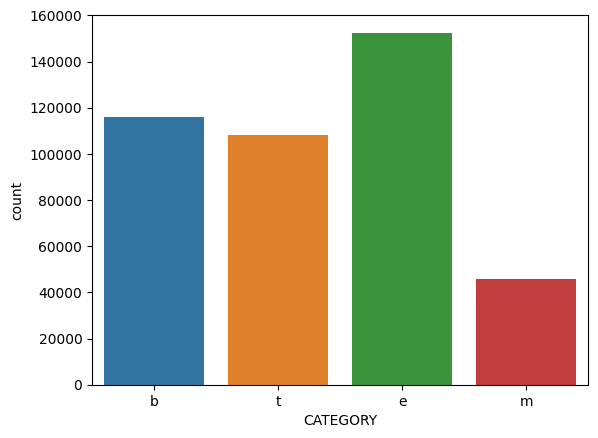

In [6]:
import seaborn as sns
sns.countplot(x = 'CATEGORY',data = text)

In [7]:
#data preprocessing
cleaned = []

for i in range(0,len(text)):
    
#removing noise and tokenizing

    txt = re.sub('[^a-zA-Z]',' ',text['TITLE'].iloc[i])
    txt = re.sub(r"[^\w\s]",'',txt.lower())
    txt = txt.split()
    
#stemming

    ps = PorterStemmer()
    txt = [ps.stem(words) for words in txt if not words in set(stopwords.words('english'))]
    txt = [words for words in txt if len(words)>2 and len(words)<20]
    txt = ' '.join(txt)
    
    
    cleaned.append(txt)

In [8]:
cleaned

['fed offici say weak data caus weather slow taper',
 'fed charl plosser see high bar chang pace taper',
 'open stock fall fed offici hint acceler taper',
 'fed risk fall behind curv charl plosser say',
 'fed plosser nasti weather curb job growth',
 'plosser fed may acceler taper pace',
 'fed plosser taper pace may slow',
 'fed plosser expect unemploy fall end',
 'job growth last month hit weather fed presid charl plosser',
 'ecb unlik end sterilis smp purchas trader',
 'ecb unlik end steril smp purchas trader',
 'half bake bank union could work',
 'europ reach crunch point bank union',
 'ecb focu stronger euro drown ecb messag keep rate low',
 'aim deal tackl fail bank',
 'forex pound drop one month low euro',
 'noyer say strong euro creat unwarr econom pressur',
 'week ahead march bank resolut transpar ukrain',
 'ecb member noyer open kind tool',
 'euro anxieti wane bund top treasuri spain debt ralli',
 'noyer say strong euro creat unwarr econom pressur',
 'noyer say stronger euro cr

In [9]:
text['cleaned']=cleaned

C:\Users\rahee\AppData\Local\Temp\ipykernel_19812\483843256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['cleaned']=cleaned


In [10]:
text

,TITLE,CATEGORY,cleaned
0,"Fed official says weak data caused by weather,...",b,fed offici say weak data caus weather slow taper
1,Fed's Charles Plosser sees high bar for change...,b,fed charl plosser see high bar chang pace taper
2,US open: Stocks fall after Fed official hints ...,b,open stock fall fed offici hint acceler taper
3,"Fed risks falling 'behind the curve', Charles ...",b,fed risk fall behind curv charl plosser say
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed plosser nasti weather curb job growth
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeon remov year old rib rebuild damag throat
422415,Boy to have surgery on esophagus after battery...,m,boy surgeri esophagu batteri burn hole throat
422416,Child who swallowed battery to have reconstruc...,m,child swallow batteri reconstruct surgeri cinc...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergo surgeri repair throat dama...


In [11]:
text.isnull().sum()

TITLE       0
CATEGORY    0
cleaned     0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
X = text['cleaned']
y = encoder.fit_transform(text['CATEGORY'])

In [14]:
pd.DataFrame(y).value_counts()

1    152469
0    115967
3    108344
2     45639
Name: count, dtype: int64

In [15]:
y.shape

(422419,)

In [16]:
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Original Categorical Values -> Numerical Values:")
for category, encoded_value in category_mapping.items():
    print(f"{category} -> {encoded_value}")

Original Categorical Values -> Numerical Values:
b -> 0
e -> 1
m -> 2
t -> 3


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3)


In [19]:
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [20]:
train_vectors

<337935x16937 sparse matrix of type '<class 'numpy.int64'>'
	with 2205022 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)



In [27]:
rf.fit(train_vectors, y_train)

RandomForestClassifier(n_estimators=50)

In [28]:
pred = rf.predict(test_vectors)


In [41]:
#import joblib 
#rfm = joblib.load('rf.sav')

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.9342715780502817

 Accuracy: 0.9313
 Sensitivity: 0.9231
 Specificity: 0.7802


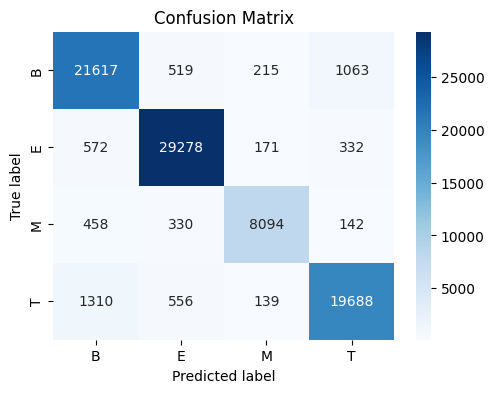

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)

cm_df = pd.DataFrame(cm,
                     index=['B','E','M','T'], 
                     columns=['B','E','M','T'])


overall_accuracy = np.trace(cm) / np.sum(cm)

sensitivity = np.diag(cm) / cm.sum(axis=1)

specificity = [(np.sum(cm) - cm[i, i]) / (np.sum(cm) - cm[:, i].sum() + cm[i, i]) for i in range(cm.shape[0])]


print(f" Accuracy: {overall_accuracy:.4f}")
print(f" Sensitivity: {np.mean(sensitivity):.4f}")
print(f" Specificity: {np.mean(specificity):.4f}")

plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [44]:
pred_probs = rf.predict_proba(test_vectors)

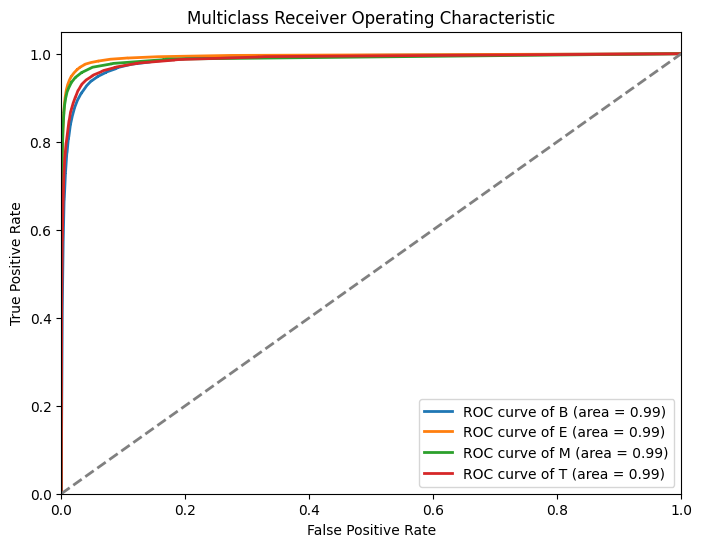

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc




n_classes = pred_probs.shape[1]


plt.figure(figsize=(8, 6))


for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of {0} (area = {1:.2f})'.format(['B', 'E', 'M', 'T'][i], roc_auc))


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [46]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, probability=True) 

In [47]:
svm_classifier.fit(train_vectors, y_train)

SVC(kernel='linear', probability=True)

In [48]:
pred = svm_classifier.predict(test_vectors)

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy:', accuracy)

Accuracy: 0.9406041380616448


 Accuracy: 0.9406
 Sensitivity: 0.9355
 Specificity: 0.7761


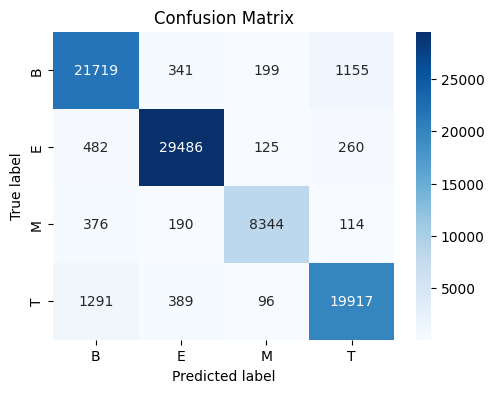

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)

cm_df = pd.DataFrame(cm,
                     index=['B','E','M','T'],  # True labels (class names)
                     columns=['B','E','M','T'])


overall_accuracy = np.trace(cm) / np.sum(cm)

sensitivity = np.diag(cm) / cm.sum(axis=1)

specificity = [(np.sum(cm) - cm[i, i]) / (np.sum(cm) - cm[:, i].sum() + cm[i, i]) for i in range(cm.shape[0])]

print(f" Accuracy: {overall_accuracy:.4f}")
print(f" Sensitivity: {np.mean(sensitivity):.4f}")
print(f" Specificity: {np.mean(specificity):.4f}")


plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [52]:
rfpred_probs = svm_classifier.predict_proba(test_vectors)

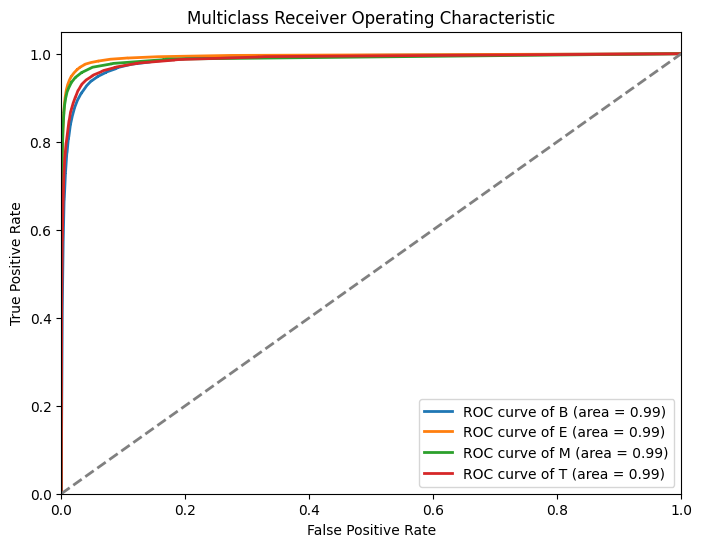

In [53]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


n_classes = pred_probs.shape[1]


plt.figure(figsize=(8, 6))


for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of {0} (area = {1:.2f})'.format(['B', 'E', 'M', 'T'][i], roc_auc))


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)


In [55]:
knn.fit(train_vectors, y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
print(knn.predict(test_vectors))

[1 0 1 ... 3 3 0]


In [57]:
pred = knn.predict(test_vectors)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy:', accuracy)

Accuracy: 0.8843804744093556


 Accuracy: 0.8844
 Sensitivity: 0.8616
 Specificity: 0.8011


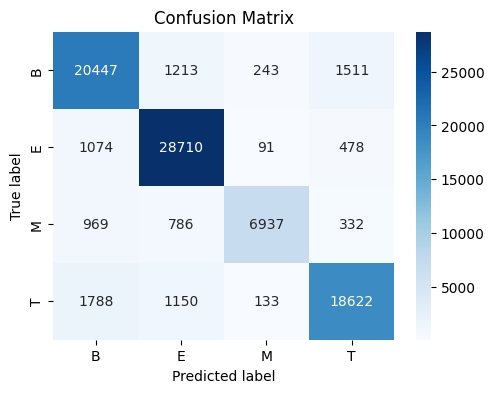

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc




cm = confusion_matrix(y_test, pred)

cm_df = pd.DataFrame(cm,
                     index=['B','E','M','T'],  # True labels (class names)
                     columns=['B','E','M','T'])


overall_accuracy = np.trace(cm) / np.sum(cm)

sensitivity = np.diag(cm) / cm.sum(axis=1)

specificity = [(np.sum(cm) - cm[i, i]) / (np.sum(cm) - cm[:, i].sum() + cm[i, i]) for i in range(cm.shape[0])]


print(f" Accuracy: {overall_accuracy:.4f}")
print(f" Sensitivity: {np.mean(sensitivity):.4f}")
print(f" Specificity: {np.mean(specificity):.4f}")


plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [60]:
pred_probs = knn.predict_proba(test_vectors)

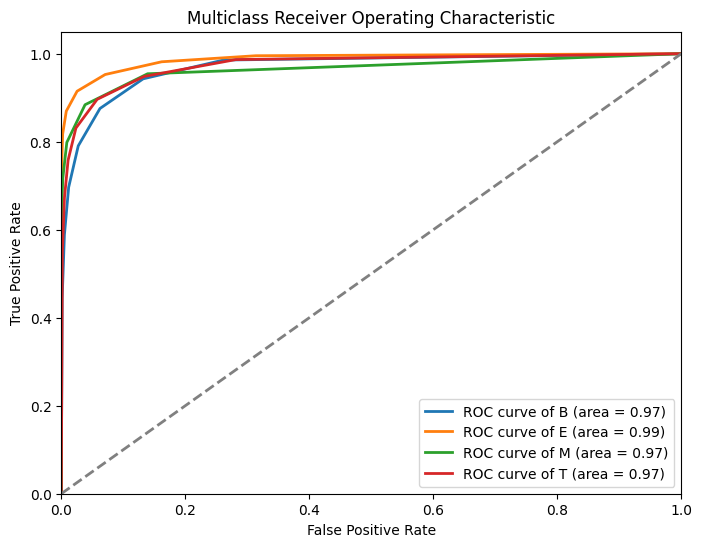

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



n_classes = pred_probs.shape[1]


plt.figure(figsize=(8, 6))


for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of {0} (area = {1:.2f})'.format(['B', 'E', 'M', 'T'][i], roc_auc))


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
